In [1]:

import numpy as np
import torchvision
from torchvision.transforms import v2
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import skimage.color


/cs/cs152/venv/lib/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/cs/cs152/venv/lib/python3.11/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue:

In [2]:
class RGB2LAB(torch.nn.Module):
    def forward(self, img):  # we assume inputs are always structured like this
        # print(img.shape)
        lab_image = skimage.color.rgb2lab(img)
        # Do some transformations. Here, we're just passing though the input
        return lab_image

class LAB2RGB(torch.nn.Module):
    def forward(self, img):  # we assume inputs are always structured like this
        rgb_image = skimage.color.lab2rgb(img)
        # Do some transformations. Here, we're just passing though the input
        return rgb_image




def split_norm(lab_img, bins=20):

    
    return torch.unsqueeze(lab_img[:, 0, :, :]/50 - 1, 1), (((lab_img[:, (1,2), :, :]/120) + 1) * (bins/2)).int()
        
        


def merge_denorm(l, ab, bins=20):

    l = (l + 1)*50
    ab = ((2*ab/bins)-1) * 120
    return torch.cat((l, ab), 1)





In [3]:

# Create datasets for training & validation, download if necessary
transform = v2.Compose(
    [
     RGB2LAB(),
     v2.ToTensor(),
     v2.ToDtype(torch.float32),
     
     v2.Resize((80, 80))],
    )


training_set = torchvision.datasets.LFWPeople('/cs/cs152/individual/treddy/celeb', split='train', transform=transform, download=True)
validation_set = torchvision.datasets.LFWPeople('/cs/cs152/individual/treddy/celeb2', split='test', transform=transform, download=True)

actual_validation_set = torchvision.datasets.LFWPeople('/cs/cs152/individual/treddy/celeb3', transform=transform, download=True)
# training_set = torchvision.datasets.OxfordIIITPet('/cs/cs152/individual/treddy/pet', split='trainval', transform=transform, download=True)
# validation_set = torchvision.datasets.OxfordIIITPet('/cs/cs152/individual/treddy/pet2', split='test', transform=transform, download=True)


/cs/cs152/venv/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


100%|████████████████████████| 243346528/243346528 [03:16<00:00, 1237257.27it/s]


Extracting /cs/cs152/individual/treddy/celeb3/lfw-py/lfw-funneled.tgz to /cs/cs152/individual/treddy/celeb3/lfw-py


100%|█████████████████████████████████| 94770/94770 [00:00<00:00, 734171.11it/s]


100%|█████████████████████████████████| 94727/94727 [00:00<00:00, 729155.35it/s]


9525
3708
13233


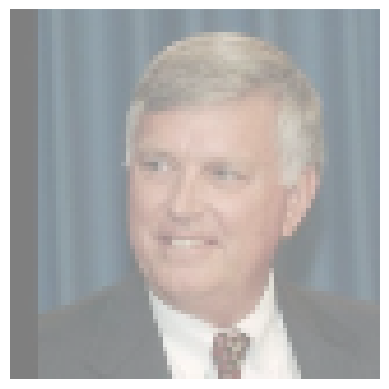

In [6]:

training_loader = torch.utils.data.DataLoader(training_set, batch_size=1, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=1, shuffle=False)
actual_validation_loader = torch.utils.data.DataLoader(actual_validation_set, batch_size=1, shuffle=False)

rgb_transforms = v2.Compose([
    # v2.ToPILImage(),
    LAB2RGB(),
    v2.ToImageTensor(),
])


# copied from pytorch docs
# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        print('1c')
        plt.imshow(npimg, cmap="Greys")
    else:
        # print('a')
        plt.imshow(np.transpose(npimg, (1, 2, 0)))



# modified version of above function
def matplotlib_imsave(img, bins, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        print('1c')
        plt.imshow(npimg, cmap="Greys")
    else:
        # print('a')
        # im = Image.fromarray(np.transpose(npimg, (1, 2, 0)))
        # im = 
        # im.save("your_file.jpeg")
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.axis('off')
        name = 'sample' + bins
        plt.savefig(name, bbox_inches='tight')



dataiter = iter(training_loader)
images, labels = next(dataiter)
rgb_images = []

# for b in [5, 10, 15, 20, 25]:
#     l, ab = split_norm(images, bins=b)
    
#     labs = merge_denorm(l, ab, bins=b)
#     for i in range(len(images)):
#         # print(images[i].shape)
#         rgb_images.append(rgb_transforms(labs[i].permute(1, 2, 0)))
    
    
    
#     # g_images =rgb_transforms(images)
    
#     # # Create a grid from the images and show them
#     img_grid = torchvision.utils.make_grid(rgb_images)
#     matplotlib_imsave(img_grid, str(b), one_channel=False)
#     rgb_images = []
# # print('  '.join(classes[labels[j]] for j in range(4)))
# for i in range(len(images)):
#         rgb_images.append(rgb_transforms(images[i].permute(1, 2, 0)))
# img_grid = torchvision.utils.make_grid(rgb_images)
# matplotlib_imsave(img_grid, 'rgb', one_channel=False)

In [9]:
from torch.nn.functional import relu

class UNet(nn.Module):
  def __init__(self):
    super().__init__()

    # input is a 64x64x1
    self.e11 = nn.Conv2d(1, 64, kernel_size=3, padding=1)  # out = 64x64x64
    self.e12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # out = 32x32x64

    self.e21 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # output = 32x32x128
    self.e22 = nn.Conv2d(128, 128, kernel_size=3, padding=1) # output: 32x32x128
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # output= 16x16x128

    self.e31 = nn.Conv2d(128, 256, kernel_size=3, padding=1) # output= 16x16x256
    self.e32 = nn.Conv2d(256, 256, kernel_size=3, padding=1) #
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 8x8x256

    self.e41 = nn.Conv2d(256, 512, kernel_size=3, padding=1) # output 8x8x512
    self.e42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2) #4x4x512

    self.e51 = nn.Conv2d(512, 1024, kernel_size=3, padding=1) # output: 30x30x1024
    self.e52 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1) # output: 28x28x1024


    self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
    self.d11 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
    self.d12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

    self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
    self.d21 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
    self.d22 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

    self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
    self.d31 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
    self.d32 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

    self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
    self.d41 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
    self.d42 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

    self.outconv = nn.Conv2d(64, 20, kernel_size=1)


  def forward(self, x):
    out_e11 = relu(self.e11(x))
    out_e12 = relu(self.e12(out_e11))
    out_ep1 = self.pool1(out_e12)

    out_e21 = relu(self.e21(out_ep1))
    out_e22 = relu(self.e22(out_e21))
    out_p2 = self.pool2(out_e22)

    out_e31 = relu(self.e31(out_p2))
    out_e32 = relu(self.e32(out_e31))
    out_p3 = self.pool3(out_e32)

    out_e41 = relu(self.e41(out_p3))
    out_e42 = relu(self.e42(out_e41))
    out_p4 = self.pool3(out_e42)

    out_e51 = relu(self.e51(out_p4))
    out_e52 = relu(self.e52(out_e51))


        # Decoder
    out_u1 = self.upconv1(out_e52)
    # print(out_u1.shape)
    # print(out_e42.shape)
    out_u11 = torch.cat([out_u1, out_e42], dim=1)
    out_d11 = relu(self.d11(out_u11))
    out_d12 = relu(self.d12(out_d11))

    out_u2 = self.upconv2(out_d12)
    out_u22 = torch.cat([out_u2, out_e32], dim=1)
    out_d21 = relu(self.d21(out_u22))
    out_d22 = relu(self.d22(out_d21))

    out_u3 = self.upconv3(out_d22)
    out_u33 = torch.cat([out_u3, out_e22], dim=1)
    out_d31 = relu(self.d31(out_u33))
    out_d32 = relu(self.d32(out_d31))

    out_u4 = self.upconv4(out_d32)
    out_u43 = torch.cat([out_u4, out_e12], dim=1)
    out_d41 = relu(self.d41(out_u43))
    out_d42 = relu(self.d42(out_d41))

    #
        # Output layer
    out1 = self.outconv(out_d42)

    out = torch.stack([ out1[:, :10], out1[:, 10:] ])

    return torch.transpose(torch.transpose(out, 0,1), 1, 2)



In [10]:

model = UNet()
model.to(device)
loss_fn = torch.nn.CrossEntropyLoss()


optimizer = torch.optim.RMSprop(params = model.parameters(), lr=2e-5, weight_decay=0.001)



In [11]:
# taken from pytorch docs and modified
def train_one_epoch(epoch_index):
    running_loss = 0.
    last_loss = 0.


    for i, data in enumerate(training_loader):

        colored, _ = data
        colored = colored.cuda()

        grey, label = split_norm(colored)

        optimizer.zero_grad()

        outputs = model(grey)

        loss = loss_fn(outputs, label.long())
        loss.backward()


        optimizer.step()


        running_loss += loss.item()
        if i % 200 == 199:
            last_loss = running_loss / 200 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    return last_loss

In [12]:
# taken from pytorch docs and modified
epoch_number = 0

EPOCHS = 80

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        # for i, vdata in enumerate(validation_loader):
        for i, vdata in enumerate(validation_loader):
            # vinputs, vlabels = vdata
            vcolored, vlabels = vdata
            vcolored = vcolored.cuda()
            vgrey, vlabel = split_norm(vcolored)
            voutputs = model(vgrey)
            vloss = loss_fn(voutputs, vlabel.long())
            # vloss = loss_fn(voutputs, vlabel)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    # writer.add_scalars('Training vs. Validation Loss',
    #                 { 'Training' : avg_loss, 'Validation' : avg_vloss },
    #                 epoch_number + 1)
    # writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        # model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        # torch.save(model.state_dict(), model_path)
    # if epoch%10 == 1:
    #     torch.save({
    #         'epoch': epoch,
    #         'model_state_dict': model.state_dict(),
    #         'optimizer_state_dict': optimizer.state_dict(),
    #         }, "'modelclassify2.pt'")

    epoch_number += 1

EPOCH 1:
  batch 200 loss: 1.1934357610344888
  batch 400 loss: 0.9432392114400864
  batch 600 loss: 0.9360846754908562
  batch 800 loss: 0.9466414487361908
  batch 1000 loss: 0.9116568204760551
  batch 1200 loss: 0.8733300217986106
  batch 1400 loss: 0.8531462496519089
  batch 1600 loss: 0.8702564546465874
  batch 1800 loss: 0.8642259296774865
  batch 2000 loss: 0.8552948394417763
  batch 2200 loss: 0.8693594422936439
LOSS train 0.8693594422936439 valid 0.8428424596786499
EPOCH 2:
  batch 200 loss: 0.8500434774160385
  batch 400 loss: 0.8370945316553116
  batch 600 loss: 0.8312386694550514
  batch 800 loss: 0.842388402223587
  batch 1000 loss: 0.8452267643809318
  batch 1200 loss: 0.8322271978855134
  batch 1400 loss: 0.8299632081389428
  batch 1600 loss: 0.836231435239315
  batch 1800 loss: 0.8396155068278313
  batch 2000 loss: 0.8352881520986557
  batch 2200 loss: 0.8394721892476081
LOSS train 0.8394721892476081 valid 0.8251029253005981
EPOCH 3:


KeyboardInterrupt: 

torch.Size([4, 10, 2, 80, 80])
torch.Size([4, 2, 80, 80])
torch.Size([4, 1, 80, 80])


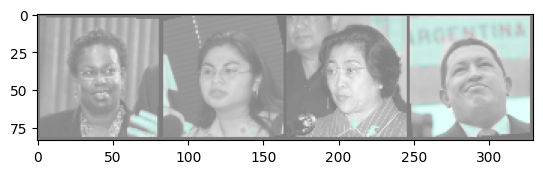

In [21]:
# dataiter = iter(validation_loader)
colored, labels = next(dataiter)

grey, label = split_norm(colored)

ab = model(grey.cuda())

print(ab.shape)
ab = torch.argmax(ab, dim=1)
print(ab.shape)
print(grey.shape)

labs = merge_denorm(grey.cuda(), ab)
labs = labs.cpu()
rgb_images = []
for i in range(len(ab)):
    # print(images[i].shape)
    rgb_images.append(rgb_transforms(labs[i].permute(1, 2, 0).detach().numpy()))


labs = merge_denorm(grey, label)
glabs = merge_denorm(grey, torch.zeros_like(label))
labs = labs.cpu()
true_images = []
for i in range(len(ab)):
    # print(images[i].shape)
    true_images.append(rgb_transforms(labs[i].permute(1, 2, 0).detach().numpy()))


grey_images = []
for i in range(len(ab)):
    # print(images[i].shape)
    grey_images.append(rgb_transforms(glabs[i].permute(1, 2, 0).detach().numpy()))


# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(rgb_images)
matplotlib_imshow(img_grid, one_channel=False)

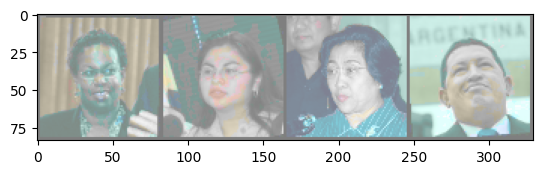

In [31]:
img_grid = torchvision.utils.make_grid(true_images)
matplotlib_imshow(img_grid, one_channel=False)

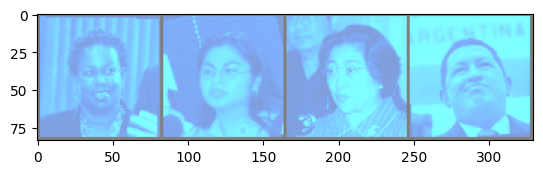

In [30]:
img_grid = torchvision.utils.make_grid(grey_images)
matplotlib_imshow(img_grid, one_channel=False)

In [ ]:
torch.save(model, "'modelclassify802.pt'")